In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Testing Notes:** this file is for consistency evaluation of version 1 model.

We have runned this file on Google Colab, so the folder path format is associated with Google Drive. In order to test this file, please change the path variables accordingly in the following cell. 

Please run every cell to the end to see the output.

In [ ]:
import os

# the path variables for required folders

# the directory that contains all the sub folders or files
main_folder = '/content/drive/MyDrive/CMPT733_Final_Project'

# the folder that contains the tables that contain ground truth and prediction results for version 1
folder_contain_ground_truth_prediction = 'evaluation_testing_files/v1_predicted_files'

os.chdir(main_folder)

In [ ]:
files = [file for file in os.listdir(folder_contain_ground_truth_prediction) if 'predicted_df' in file]
files

['coronavirus_predicted_df_v1.csv',
 'coronaupdate_predicted_df_v1.csv',
 'selfisolating_predicted_df_v1.csv',
 'quarantine_predicted_df_v1.csv',
 'wearamask_predicted_df_v1.csv',
 'stayhomestaysafe_predicted_df_v1.csv',
 'pneumonia_predicted_df_v1.csv',
 'herdimmunity_predicted_df_v1.csv',
 'wfh_predicted_df_v1.csv',
 'covid19_predicted_df_v1.csv',
 'sarscov2_predicted_df_v1.csv',
 'washyourhands_predicted_df_v1.csv',
 'coronavaccine_predicted_df_v1.csv',
 'flattenthecurve_predicted_df_v1.csv',
 'covidvaccine_predicted_df_v1.csv',
 'workfromhome_predicted_df_v1.csv',
 'ppe_predicted_df_v1.csv',
 'socialdistancing_predicted_df_v1.csv',
 'lockdown_predicted_df_v1.csv',
 'pandemic_predicted_df_v1.csv']

In [ ]:
consistency_df = pd.DataFrame(columns=['consistency %', 'hashtag_name'])

for file in files:
  file_name_list = file.split("_")
  tag_name = file_name_list[0]
  df = pd.read_csv('./' + folder_contain_ground_truth_prediction + '/' + file, lineterminator='\n')
  df['result'] = np.where(df[tag_name] == df[tag_name + '_ground_truth'], 1, 0)
  result_df = pd.DataFrame(df['result'].value_counts(normalize=True) * 100).reset_index()
  result_df = result_df.loc[result_df['index'] == 1][['result']]
  result_df = result_df.rename(columns = {'result': 'consistency %'})
  result_df['hashtag_name'] = tag_name

  consistency_df = consistency_df.merge(result_df, how='outer')

consistency_df = consistency_df.round(2)
consistency_df

,consistency %,hashtag_name
0,14.38,coronavirus
1,62.25,coronaupdate
2,50.25,selfisolating
3,35.50,quarantine
4,48.86,wearamask
5,66.45,stayhomestaysafe
6,65.73,pneumonia
7,69.06,herdimmunity
8,8.14,wfh
9,33.55,covid19


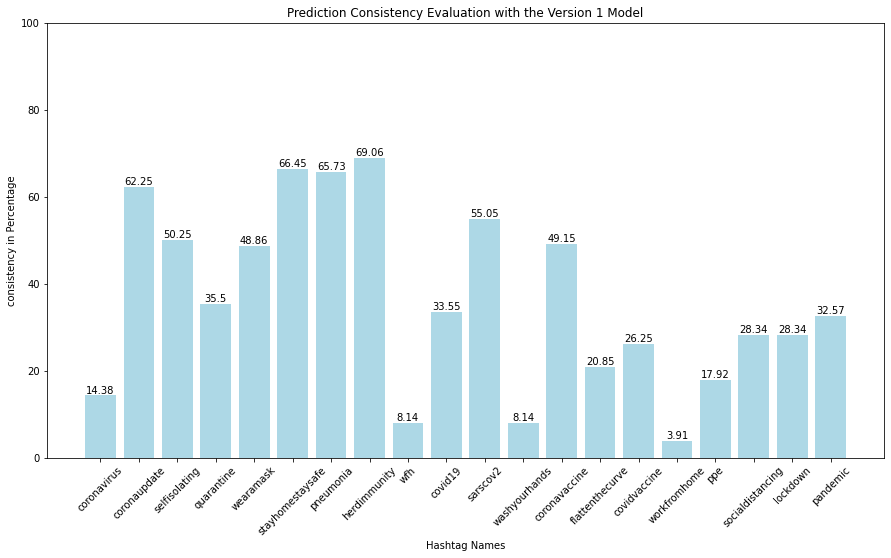

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
plt.ylim(0, 100)
plt.ylabel('consistency in Percentage')
plt.xlabel('Hashtag Names')
plt.title('Prediction Consistency Evaluation with the Version 1 Model')
plt.bar(consistency_df['hashtag_name'], consistency_df['consistency %'], color="lightblue")

consistency_list = consistency_df['consistency %'].to_list()

for i in range(len(consistency_df['consistency %'])):
  plt.text(i, consistency_list[i], consistency_list[i], ha = 'center', va = 'bottom')

plt.show()
